## Building CNN classification model on Devanagari Dataset which has 46 different classes.

In [1]:
# library imports
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
import cv2
import os,glob
import cv2

In [2]:
# Collecting all files in list
base_path = '../CSV/DevanagariHandwrittenCharacterDataset/'
image_dir = '*/*/*.png'
all_files_limit = glob.glob(base_path+image_dir)
all_files = all_files_limit

In [3]:
# Shuffle all images in collected list
np.random.shuffle(all_files)  

In [4]:
# Creating list for each image and their label
image_size = 200
X = [] 
Y =[]
for image_path in all_files:
    image_label = image_path.split('/')[-2].split('_')[-1]
    image_array = cv2.imread(image_path) 
    image_array = cv2.resize(image_array , (image_size  , image_size) ) 
    X.append(image_array)
    Y.append(image_label)

(<matplotlib.image.AxesImage at 0x7f11603c7880>, 'dhaa')

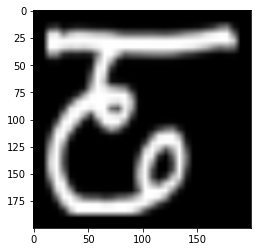

In [5]:
# Verify the mapping between X and Y dataset
plt.imshow(X[0]),Y[0]

In [6]:
# Converting X to array and performing normalization of pixels
X = np.array(X)
X = X/255 

In [7]:
X

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [8]:
# Creating unique index for unique categories
labels = np.unique(Y)
label_relations = {}  # Mapping categories to indices
label_verification = {} # Mapping indices to categories
for i in range(len(labels)):
    y=i
    label_relations[labels[i]] = y
    label_verification[y] = labels[i]

In [9]:
label_relations,label_verification

({'1': 0, '9': 1, 'dhaa': 2, 'patalosaw': 3, 'taamatar': 4},
 {0: '1', 1: '9', 2: 'dhaa', 3: 'patalosaw', 4: 'taamatar'})

In [10]:
Y

['dhaa',
 'dhaa',
 '9',
 '9',
 '9',
 '9',
 'patalosaw',
 'patalosaw',
 'patalosaw',
 '9',
 '9',
 'dhaa',
 '1',
 '9',
 'patalosaw',
 '9',
 'dhaa',
 '1',
 '9',
 'dhaa',
 '9',
 'patalosaw',
 'patalosaw',
 'patalosaw',
 '9',
 '1',
 'dhaa',
 '1',
 'dhaa',
 '9',
 'patalosaw',
 '1',
 'dhaa',
 '9',
 '1',
 'patalosaw',
 '1',
 '1',
 'dhaa',
 'patalosaw',
 'dhaa',
 '9',
 'patalosaw',
 '9',
 'patalosaw',
 'dhaa',
 'dhaa',
 'dhaa',
 'patalosaw',
 'patalosaw',
 '1',
 'patalosaw',
 '1',
 '1',
 '1',
 'dhaa',
 '1',
 '1',
 '9',
 '9',
 'dhaa',
 'dhaa',
 '1',
 '1',
 '9',
 '1',
 'patalosaw',
 '1',
 'patalosaw',
 '1',
 'dhaa',
 'patalosaw',
 'taamatar',
 '1',
 'dhaa',
 'patalosaw',
 'patalosaw',
 '9',
 '9',
 'patalosaw',
 'patalosaw',
 'taamatar',
 '1',
 'patalosaw',
 '9',
 '9',
 'patalosaw',
 'patalosaw',
 '9',
 '1',
 'dhaa',
 '9',
 'dhaa',
 'patalosaw',
 '9',
 'patalosaw',
 'patalosaw',
 '9',
 '1',
 '9',
 '9',
 '1',
 'patalosaw',
 'dhaa',
 '9',
 'patalosaw',
 'dhaa',
 '1',
 'dhaa',
 '1',
 'dhaa',
 'patalo

In [11]:
# Converting categorical Y into respective index
new_Y = []
for label in Y:
    new_Y.append(label_relations[label])

In [12]:
# Converting Y index list to array
Y = np.array(new_Y)

In [13]:
Y

array([2, 2, 1, ..., 2, 3, 0])

In [14]:
# Performing train test split (80%-20%)
test_train_split_param = .8
slice_index = int(len(X)*test_train_split_param)
train_x = X[:slice_index]
train_y = Y[:slice_index]
test_x = X[slice_index:]
test_y = Y[slice_index:]

In [15]:
# Setting up the layers in the model
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D ,Flatten , Dense
from keras.utils import to_categorical
model = Sequential()
model.add(Conv2D(filters = 16 , kernel_size =(3,3) , activation ='relu'  ,   ))
model.add(MaxPool2D(pool_size =(2,2)))


model.add(Conv2D(filters = 32 , kernel_size =(3,3) , activation= 'relu'))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Flatten())

model.add(Dense(128 , activation = 'relu' , input_shape = train_x.shape[1:]))
model.add(Dense(len(labels) , activation= 'softmax'))

In [16]:
# Compliling the model with Adam optimizer
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [18]:
# Training the model
model.fit(train_x , train_y , epochs = 2);

Epoch 1/2
175/175 [==============================] - 49s 275ms/step - loss: 0.4483 - accuracy: 0.8707
Epoch 2/2
175/175 [==============================] - 48s 274ms/step - loss: 0.0196 - accuracy: 0.9936


In [19]:
# Making the prediction
pred  = model.predict_classes( test_x) ;

/home/adarsh/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [20]:
# Checking the accuracy using Confusion Matrix
from sklearn.metrics import confusion_matrix
tab1 = confusion_matrix(pred , test_y )
print(tab1)

[[337   0   0   0   0]
 [  6 317   0   2   0]
 [  0   1 345   1   2]
 [  0   0   2 343   0]
 [  0   1   0   0  43]]


(<matplotlib.image.AxesImage at 0x7f115c2bdc70>, '1')

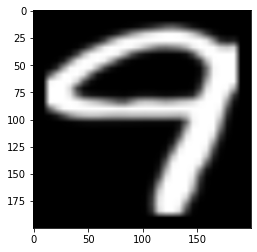

In [21]:
plt.imshow(test_x[3]),label_verification[pred[3]]

In [22]:
# Calculating the accuracy of the model
tab1.diagonal().sum() * 100/ tab1.sum()

98.92857142857143

In [23]:
from sklearn.metrics import f1_score

In [26]:
# calculating f1 score to access the model performance
f1_score(test_y, pred,average='weighted')*100

98.92916157676858